###Assignment 6: Path Planning for a Robot

Objective: Use A* Search to find an optimal path for a robot navigating a 2D grid.

Problem Statement: A robot must move from a start point to a goal in a grid while avoiding obstacles.

Tasks:

Implement A* with:
* The Manhattan distance heuristic applies to grids without any diagonal
movement.
* The Euclidean distance heuristic is applicable to grids that allow diagonal
movement.
* Use a plotting library to visualize the found path.
* Compare A* with BFS and Uniform Cost Search.

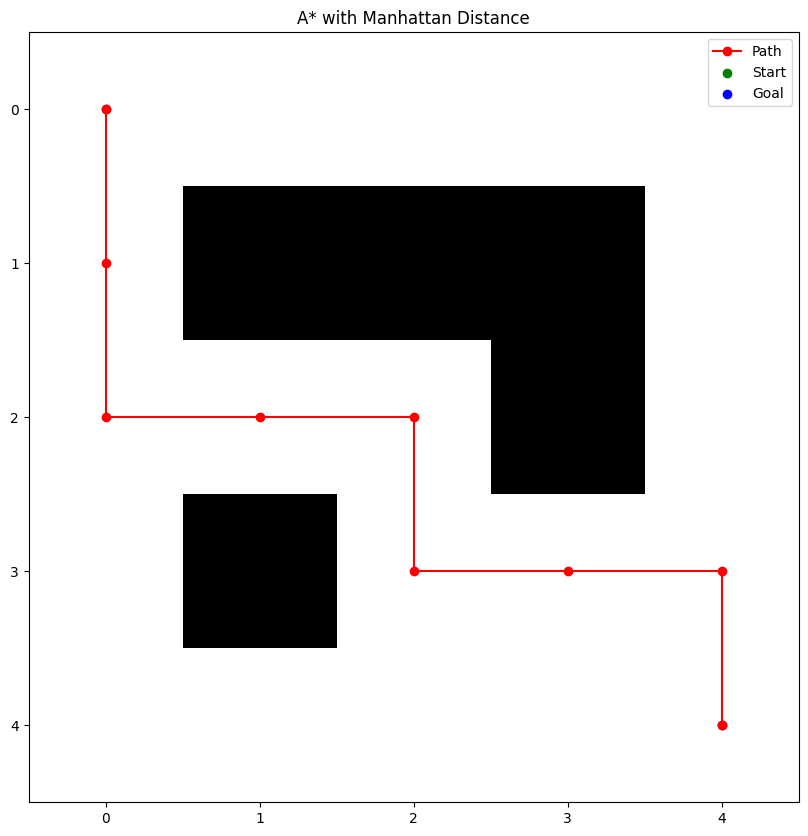

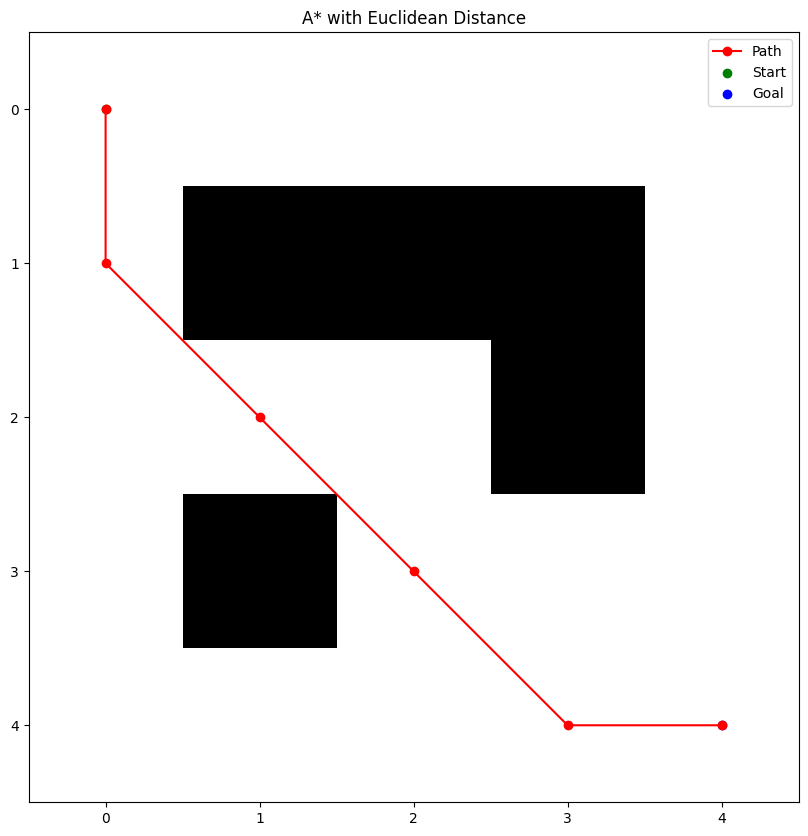

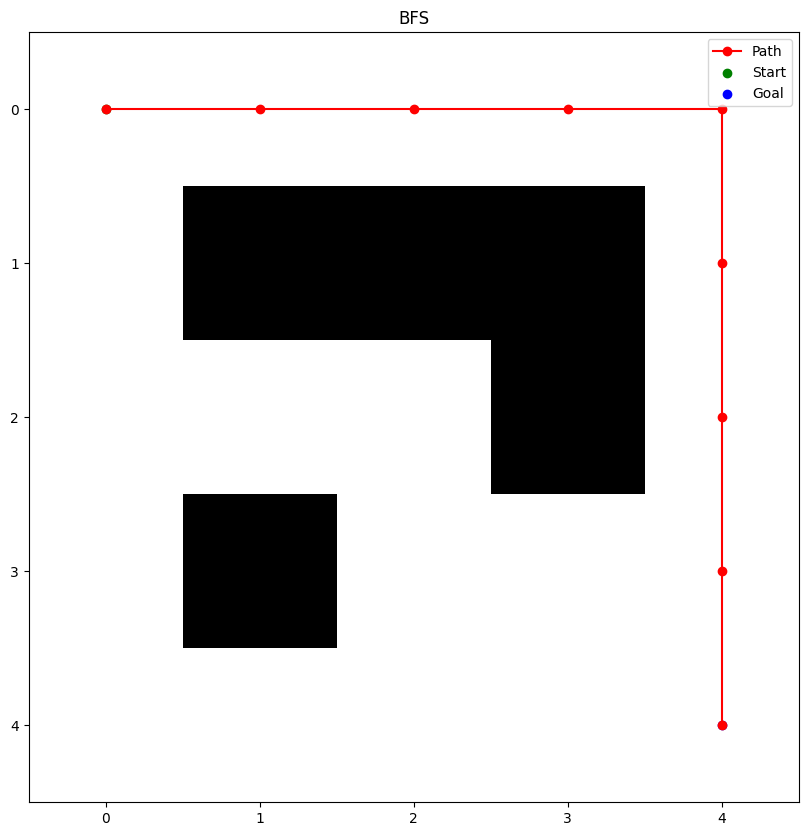

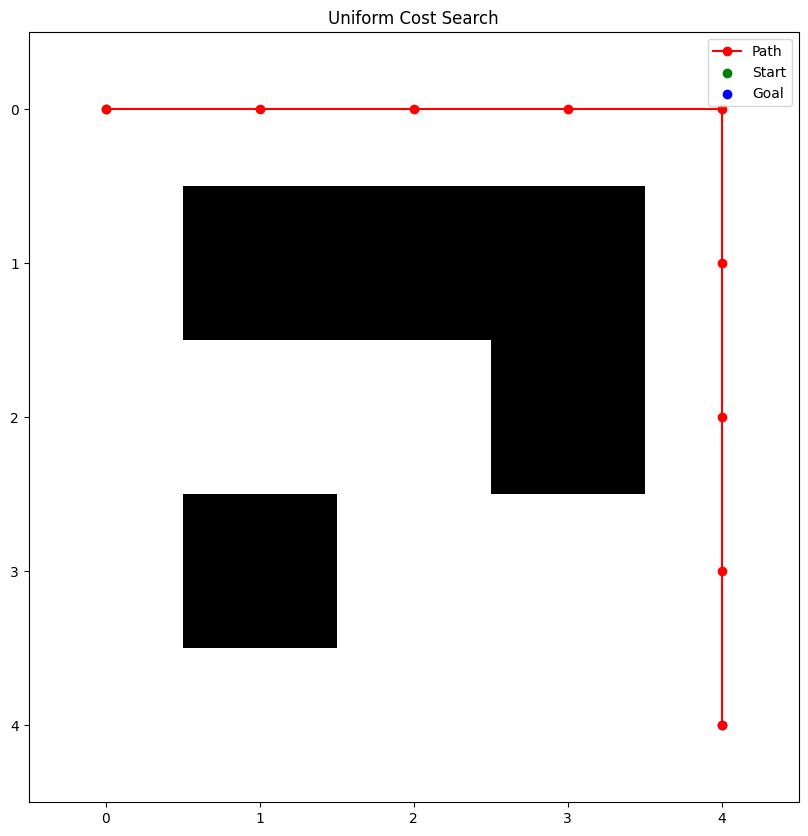

A* (Manhattan) Path Length: 9
A* (Euclidean) Path Length: 6
BFS Path Length: 9
UCS Path Length: 9


In [ ]:
import heapq
import math
import matplotlib.pyplot as plt

class Node:
    def __init__(self, position, parent=None):
        self.position = position
        self.parent = parent
        self.g = 0
        self.h = 0
        self.f = 0

    def __eq__(self, other):
        return self.position == other.position

    def __lt__(self, other):
        return self.f < other.f

def manhattan_distance(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def euclidean_distance(a, b):
    return math.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)

def a_star_search(grid, start, goal, heuristic):
    open_list = []
    closed_list = set()

    start_node = Node(start)
    goal_node = Node(goal)

    heapq.heappush(open_list, start_node)

    while open_list:
        current_node = heapq.heappop(open_list)
        closed_list.add(current_node.position)

        if current_node == goal_node:
            path = []
            while current_node:
                path.append(current_node.position)
                current_node = current_node.parent
            return path[::-1]

        neighbors = [(0, -1), (0, 1), (-1, 0), (1, 0)]
        if heuristic == euclidean_distance:
            neighbors += [(-1, -1), (-1, 1), (1, -1), (1, 1)]

        for dx, dy in neighbors:
            neighbor_pos = (current_node.position[0] + dx, current_node.position[1] + dy)

            if 0 <= neighbor_pos[0] < len(grid) and 0 <= neighbor_pos[1] < len(grid[0]) and grid[neighbor_pos[0]][neighbor_pos[1]] == 0:
                neighbor_node = Node(neighbor_pos, current_node)
                neighbor_node.g = current_node.g + 1
                neighbor_node.h = heuristic(neighbor_pos, goal)
                neighbor_node.f = neighbor_node.g + neighbor_node.h

                if neighbor_node.position in closed_list:
                    continue

                if neighbor_node not in open_list:
                    heapq.heappush(open_list, neighbor_node)

    return None

def bfs_search(grid, start, goal):
    from collections import deque

    queue = deque()
    queue.append((start, [start]))
    visited = set()

    while queue:
        (current, path) = queue.popleft()
        if current == goal:
            return path

        for dx, dy in [(0, -1), (0, 1), (-1, 0), (1, 0)]:
            neighbor = (current[0] + dx, current[1] + dy)
            if (0 <= neighbor[0] < len(grid)) and (0 <= neighbor[1] < len(grid[0])) and grid[neighbor[0]][neighbor[1]] == 0 and neighbor not in visited:
                visited.add(neighbor)
                queue.append((neighbor, path + [neighbor]))

    return None

def ucs_search(grid, start, goal):
    open_list = []
    heapq.heappush(open_list, (0, start, [start]))
    closed_list = set()

    while open_list:
        (cost, current, path) = heapq.heappop(open_list)
        if current == goal:
            return path

        if current in closed_list:
            continue

        closed_list.add(current)

        for dx, dy in [(0, -1), (0, 1), (-1, 0), (1, 0)]:
            neighbor = (current[0] + dx, current[1] + dy)
            if (0 <= neighbor[0] < len(grid)) and (0 <= neighbor[1] < len(grid[0])) and grid[neighbor[0]][neighbor[1]] == 0:
                heapq.heappush(open_list, (cost + 1, neighbor, path + [neighbor]))

    return None

def plot_path(grid, path, title):
    plt.figure(figsize=(10, 10))
    plt.imshow(grid, cmap='Greys', origin='upper')

    if path:
        x, y = zip(*path)
        plt.plot(y, x, marker='o', color='red', label='Path')
        plt.scatter(y[0], x[0], color='green', label='Start')
        plt.scatter(y[-1], x[-1], color='blue', label='Goal')

    plt.legend()
    plt.title(title)
    plt.show()

grid = [
    [0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0],
    [0, 0, 0, 1, 0],
    [0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0]
]

start = (0, 0)
goal = (4, 4)

path_a_star_manhattan = a_star_search(grid, start, goal, manhattan_distance)
plot_path(grid, path_a_star_manhattan, "A* with Manhattan Distance")

path_a_star_euclidean = a_star_search(grid, start, goal, euclidean_distance)
plot_path(grid, path_a_star_euclidean, "A* with Euclidean Distance")

path_bfs = bfs_search(grid, start, goal)
plot_path(grid, path_bfs, "BFS")

path_ucs = ucs_search(grid, start, goal)
plot_path(grid, path_ucs, "Uniform Cost Search")

print("A* (Manhattan) Path Length:", len(path_a_star_manhattan))
print("A* (Euclidean) Path Length:", len(path_a_star_euclidean))
print("BFS Path Length:", len(path_bfs))
print("UCS Path Length:", len(path_ucs))